In [1]:
import torch
import torch.nn as nn
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

In [2]:
train_dataset = datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())

train_loader = DataLoader(dataset=train_dataset, batch_size=100, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=100, shuffle=False)

In [10]:
a = next(iter(train_loader))

In [18]:
a[0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [3]:
print(train_dataset.data.shape, test_dataset.data.shape)

torch.Size([60000, 28, 28]) torch.Size([10000, 28, 28])


In [4]:
import matplotlib.pyplot as plt

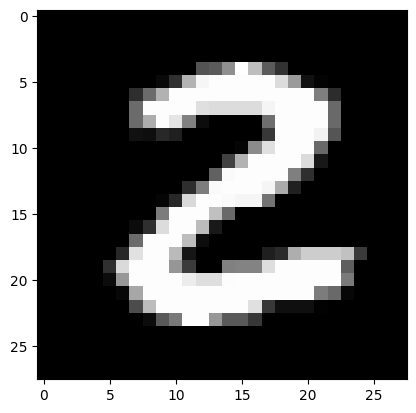

In [5]:
plt.imshow(train_dataset.data[25], 'gray')
plt.show()

In [8]:
train_dataset.data[25]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  83,  91,
         143, 255, 190,  91,  50,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   9,  49, 180, 246, 253,
         253, 253, 253, 253, 220, 154,  17,   3,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,  4

In [9]:
train_dataset.targets[25]

tensor(2)

In [ ]:
import torch

In [ ]:
import torch.nn as nn
import torch.optim as optim

In [ ]:
import torch.optim as optim
import torch.nn.functional as F

In [ ]:
class FCN(nn.Module):

  def __init__(self, in_sz, out_sz, layers=[120, 84]):
    super().__init__()
    self.fc1 = nn.Linear(in_sz, layers[0])
    self.fc2 = nn.Linear(layers[0], layers[1])
    self.fc3 = nn.Linear(layers[1], out_sz)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

In [ ]:
model = FCN(784, 10)
model

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)

In [ ]:
num_epochs = 1
for epoch  in range(num_epochs):
  tst_corr = 0
  model.train()
  for i, (images, labels) in enumerate(train_loader):
      images = images.reshape(-1, 28*28)

      # Forward pass
      outputs = model(images)
      loss = criterion(outputs, labels)

      # Backward and optimize
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      # --
      if (i+1) % 100 == 0:
              print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')

  # 테스트
  with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f'Accuracy of the model on the 10000 test images: {100 * correct / total} %')



In [ ]:
tmp = iter(test_loader)
images, labels = next(tmp)
print(images.shape)

In [ ]:
import numpy as np
with torch.no_grad():
  model.to('cpu')
  model.eval()
  y_pred = model(images.reshape(-1, 28*28))
  y_pred2 = np.argmax(y_pred.numpy(), axis=1)
  y = labels

In [ ]:
print(y.shape)

In [ ]:
# 3행 3열 9 개 데이터만 시각화, title에 정답, 예측값 표시. 이미지 형식 (28, 28)로 reshape 필요
# 행 : 5, 열 : 20 한 배치 데이터를 시각화, title에 정답, 예측값 표시 이미지 형식(28, 28,) 유의

In [ ]:
def display_test(x, y, y_pred):
  plt_r = 5
  plt_c = 20

  plt.figure(figsize=(15, 5))

  for y_pos in range(plt_r):
    for x_pos in range(plt_c):
      idx = y_pos*plt_c + x_pos

      plt.subplot(plt_r, plt_c, idx+1)

      prt = '[%d, %d]' % (y[idx], y_pred[idx])
      plt.title(prt)
      plt.imshow(x[idx].reshape(28,28), 'gray')

      ax = plt.gca()
      ax.axes.xaxis.set_visible(False)
      ax.axes.yaxis.set_visible(False)

  plt.show()


In [ ]:
display_test(images, y, y_pred2)

# import os    
os.environ['KMP_DUPLICATE_LIB_OK']='True'